In [1]:
import tensorflow as tf
import keras as ker
from keras.datasets import mnist
import matplotlib.pyplot as plt
print('tf version : ' , tf.__version__)
print('keras version : ' , ker.__version__)

Using TensorFlow backend.


tf version :  1.4.0
keras version :  2.1.5


In [2]:
# 查看訓練資料
(x_train_image,y_train_label), \
(x_test_image,y_test_label) = mnist.load_data()
print('train data=', len(x_train_image)," , shape:資料維度 : ", x_train_image.shape) 
print('train label=', len(y_train_label)," , shape:資料維度 : ",y_train_label.shape) 

train data= 60000  , shape:資料維度 :  (60000, 28, 28)
train label= 60000  , shape:資料維度 :  (60000,)


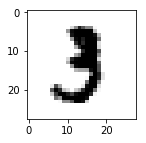

3

In [3]:
def plot_image(image):
    fig = plt.gcf() 
    fig.set_size_inches(2,2) #設定顯示圖形大小
    plt.imshow(image,cmap='binary') #顯示圖形
    plt.show()
plot_image(x_train_image[10]) # x_train_image : 欲訓練圖檔資料
y_train_label[10] # y_train_label : 欲訓練圖檔標籤

In [4]:
# images(數字影像) labels(真實值) prediction(預測結果) idx(開始顯示資料的index) num(顯示的資料筆數，上限為25)
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14) #設定顯示圖形大小
    if num>25: num =25 #顯示的資料筆數，上限為25
    for i in range(0,num):
        ax =plt.subplot(5,5,1+i) #建立子圖形有五行五列
        ax.imshow(images[idx], cmap='binary')
        title = "label" + str(labels[idx]) #建立子圖形title之標籤欄位
        if len(prediction)>0: #假如有傳入預測結果
            title += ", predict=" + str(prediction[idx]) #子圖形title加入預測結果
        ax.set_title(title,fontsize=10) #設定子圖形的標題title與大小
        ax.set_xticks([]); ax.set_yticks([]) #設定不顯示刻度
        idx+=1 #讀取下一筆
    plt.show()
    

test data= 10000 (10000, 28, 28)
test labe;= 10000 (10000,)


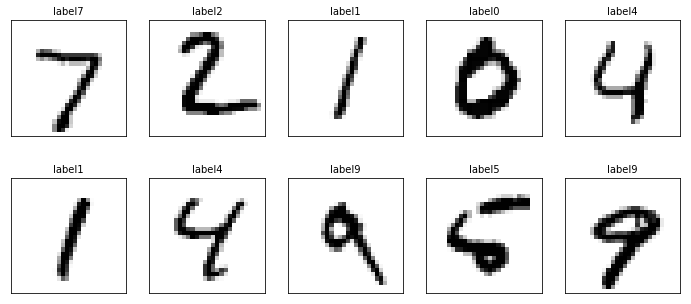

In [5]:
print('test data=', len(x_test_image),x_test_image.shape)
print('test labe;=', len(y_test_label),y_test_label.shape)
plot_images_labels_prediction(x_test_image,y_test_label,[],0,10)

In [6]:
#資料 => 向量化 => 標準化
x_Train = x_train_image.reshape(60000,784).astype('float32') #轉化為1維長度為784的向量
x_Test = x_test_image.reshape(10000,784).astype('float32') #轉化為1維長度為784的向量
print('x_Train',x_Train.shape)
print('x_Test',x_Test.shape)
# image特徵化 (0~255)
x_Train_Normalize = x_Train/255
x_Test_Normalize = x_Test /255
x_Train_Normalize[0]

x_Train (60000, 784)
x_Test (10000, 784)


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [7]:
# 標籤 => One-hot encoding轉換 => 長度為10的向量編碼
from keras.utils import np_utils
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)
y_TrainOneHot[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [9]:
# 建立Dense神經網路層
model = Sequential()

#加入輸入層&隱藏層1
model.add(Dense(units=1000, #修改隱藏層神經元為1000
                input_dim=784,
                kernel_initializer="normal",
                activation="relu"))
# 隨機放棄50%神經元
model.add(Dropout(0.5))

#建立隱藏層2
model.add(Dense(units=1000, #修改隱藏層神經元為1000
                kernel_initializer="normal",
                activation="relu"))
# 隨機放棄50%神經元
model.add(Dropout(0.5))

#加入輸出層
model.add(Dense(units=10,
                kernel_initializer="normal",
                activation="softmax"))



In [10]:
#模型摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
#模型設定
model.compile(loss="categorical_crossentropy",
            optimizer="adam",metrics=['accuracy'])

In [12]:
#模型訓練(代入訓練資料進行訓練)
train_history = model.fit(x=x_Train_Normalize,  # x_Train_Normalize(經過特徵化訓的練資料)
                          y=y_TrainOneHot,      # y_TrainOneHot(訓練標籤)
                          validation_split=0.2,
                          epochs=10,
                          batch_size=200,
                          verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 14s - loss: 0.3642 - acc: 0.8868 - val_loss: 0.1304 - val_acc: 0.9604
Epoch 2/10
 - 13s - loss: 0.1612 - acc: 0.9501 - val_loss: 0.0993 - val_acc: 0.9694
Epoch 3/10
 - 13s - loss: 0.1186 - acc: 0.9634 - val_loss: 0.0907 - val_acc: 0.9733
Epoch 4/10
 - 13s - loss: 0.0993 - acc: 0.9694 - val_loss: 0.0864 - val_acc: 0.9746
Epoch 5/10
 - 13s - loss: 0.0868 - acc: 0.9719 - val_loss: 0.0787 - val_acc: 0.9779
Epoch 6/10
 - 12s - loss: 0.0725 - acc: 0.9764 - val_loss: 0.0816 - val_acc: 0.9783
Epoch 7/10
 - 12s - loss: 0.0671 - acc: 0.9785 - val_loss: 0.0788 - val_acc: 0.9789
Epoch 8/10
 - 12s - loss: 0.0609 - acc: 0.9802 - val_loss: 0.0760 - val_acc: 0.9773
Epoch 9/10
 - 13s - loss: 0.0588 - acc: 0.9806 - val_loss: 0.0746 - val_acc: 0.9794
Epoch 10/10
 - 13s - loss: 0.0507 - acc: 0.9839 - val_loss: 0.0825 - val_acc: 0.9774


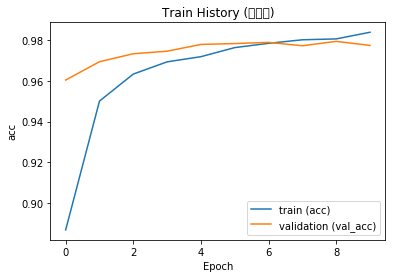

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation,title):
    plt.plot(train_history.history[train]) #acc
    plt.plot(train_history.history[validation]) #val_acc
    plt.title('Train History ('+ title + ')')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train (acc)','validation (val_acc)'],
               loc='lower right')
show_train_history(train_history,'acc','val_acc','準確率')

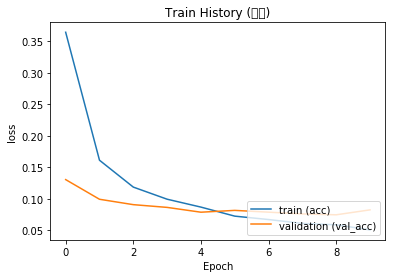

In [14]:
show_train_history(train_history,'loss','val_loss','誤差')

In [15]:
#測試模型準確率
sources = model.evaluate(x_Test_Normalize,y_TestOneHot)
print('accuracy=',sources[1])

10000/10000 [==============================] - 1s 126us/step
accuracy= 0.9816


In [16]:
#取得預測結果
prediction = model.predict_classes(x_Test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

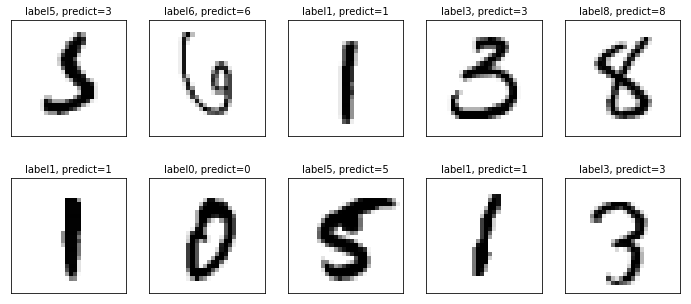

In [17]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

In [18]:
#建立混淆矩陣
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predit'])

predit,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,1,1,0,0,0,3,1,1,0
1,0,1129,1,1,0,1,2,0,1,0
2,2,2,1016,2,1,0,1,5,3,0
3,0,0,2,998,0,6,0,3,1,0
4,0,3,1,0,964,0,7,2,0,5
5,2,0,0,9,1,869,7,1,3,0
6,3,2,0,0,1,2,950,0,0,0
7,0,11,5,2,0,0,0,1006,0,4
8,1,1,5,7,2,4,4,3,944,3


In [19]:
#建立真實值&預測DataFrame
df = pd.DataFrame({'label':y_test_label,'predict':prediction})

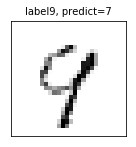

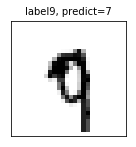

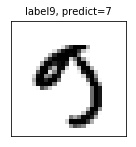

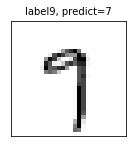

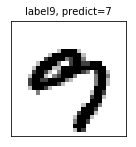

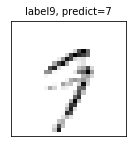

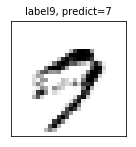

In [20]:
temp_df = df[(df.label==9)&(df.predict==7)]
error_list = temp_df.index.tolist()
for index,item in enumerate(error_list):
    plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx= item,num=1)